In [1]:
import sys
sys.path.append("../../")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

import src.utils.pre_process as pp
import src.utils.models as arch

In [2]:
path_audio = '../../dataset/test/5_theo_48.wav'
path_model = '../../history/mfcc/aa6672f187044594896bfaee1a62c1ec.h5'

In [3]:
ipd.Audio(path_audio)

In [4]:
def show_wave(samples, sampling_rate):
    plt.figure(figsize=(15, 3))
    librosa.display.waveplot(samples, sr=sampling_rate)
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Amplitude')
    plt.show()

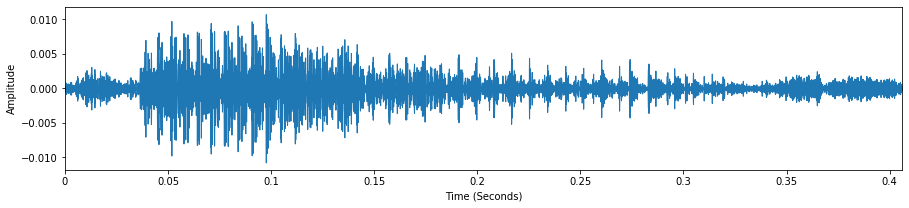

In [5]:
signal, sample_rate = librosa.load(path_audio)
emp_signal = pp.pre_emp_op(signal)
show_wave(emp_signal, sample_rate)

In [6]:
features = np.array([pp.extract_features(emp_signal, sample_rate)])

In [7]:
model = arch.mlp(features.shape[1], 10)
model.load_weights(path_model)

In [8]:
pred_class = np.argmax(model.predict(features), axis=-1)
print(f'Predict Class is {pred_class[0]}')

Predict Class is 5
